In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from math import sqrt

In [2]:
advertising_df = pd.read_csv('datasets/Advertising.csv', index_col=0)

In [3]:
advertising_df.loc[0:4]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5


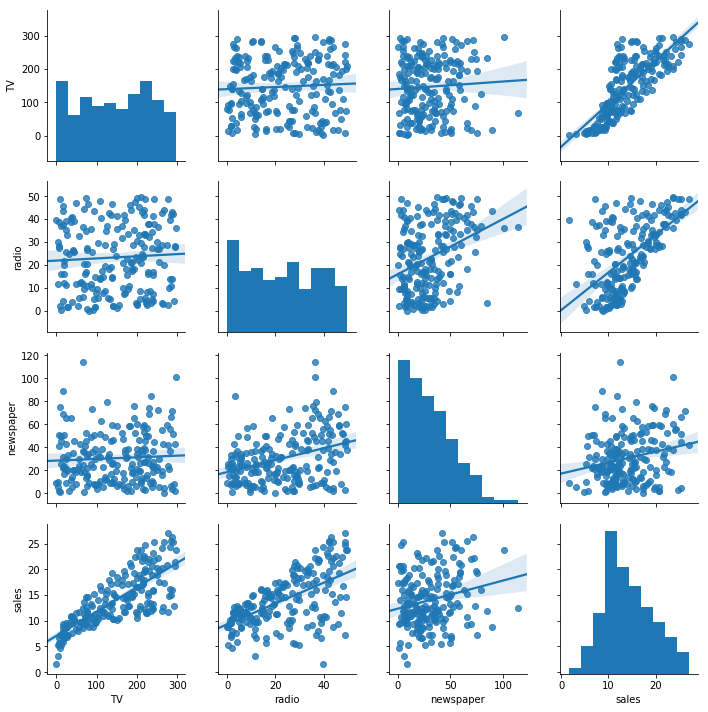

In [4]:
sns.pairplot(data=advertising_df,kind='reg')

In [5]:
mod = ols(formula='sales ~ TV', data=advertising_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.47e-42
Time:                        11:35:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Esto dice que el intervalo de confianza del 95 % de $\beta_{0}$ es [6.130       7.935] lo que quiere decir que en ausencia de propaganda en TV las ventas se encontraran en ese intervalo.
Tambien dice que el intervalo de confianza del 95 % para $\beta_{1}$ es [0.042       0.053] lo que quiere decir que invirtiendo $1000 en TV se puede ganar entre [42,53] en ventas.

In [6]:
res.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p_values son bajisimos con lo cual se rechaza la hipotesis nula que los coheficientes son cero por la hipotesis alternativa que los coheficientes son distintos de cero.

In [7]:
sqrt(res.mse_total)

5.217456565710478

In [8]:
mod = ols(formula='sales ~ TV + radio + newspaper', data=advertising_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           1.58e-96
Time:                        11:36:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [9]:
mod = ols(formula='sales ~ newspaper', data=advertising_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 02 Aug 2018   Prob (F-statistic):            0.00115
Time:                        14:32:58   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

In [10]:
advertising_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Haciendo regresion de sales sobre newspaper se que newspaper tiene influencia sobre sales, pero haciendo regresion sobre todas las variables se ve que tiene poca influencia.

correlation between radio and newspaper is 0.35. This reveals a
tendency to spend more on newspaper advertising in markets where more
is spent on radio advertising